In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import warnings
from PIL import Image
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
warnings.filterwarnings("ignore")

In [2]:
# Set global options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Define a function to style DataFrames using Pandas built-in methods
def style_dataframe(df):
    return df.style.set_table_styles(
            [{
                'selector': 'th',
                'props': [
                    ('background-color', '#DFDFDF'),
                    ('color', '#333'),
                    ('font-family', 'Helvetica, Arial, sans-serif'),
                    ('font-weight', 'bold'),
                    ('text-align', 'center')
                ]
            },
            {
                'selector': 'td',
                'props': [
                    ('background-color', '#FAFAFA'),
                    ('color', '#333'),
                    ('font-family', 'Helvetica, Arial, sans-serif'),
                    ('text-align', 'center')
                ]
            }]
        ).set_properties(**{
            'border-color': 'transparent',
            'height': '30px',
            'transition': 'all 0.3s'
        })
# display(style_dataframe(your_dataframe))

# ANSI escape codes for colors
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    OKCYAN = '\033[96m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    HEADER = '\033[95m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'

def print_summary(features, num_classes, title):
    print(color.BOLD + color.CYAN + '=' * 40 + color.END)
    print(color.BOLD + color.CYAN + title.center(40) + color.END)
    print(color.BOLD + color.CYAN + '=' * 40 + color.END)
    print(f"{color.YELLOW}{'Total number of images:':<30}{color.END} {len(features):>10}")
    print(f"{color.YELLOW}{'Total number of classes:':<30}{color.END} {num_classes:>10}")
    print(f"{color.YELLOW}{'Number of images per class:':<30}{color.END} {len(features) // num_classes:>10}")
    feature_shape = features[next(iter(features))].shape
    print(f"{color.YELLOW}{'Features per image:':<30}{color.END} {feature_shape[0]} (PCA components) x {feature_shape[1]} (color channels)")
    print(color.BOLD + color.CYAN + '=' * 40 + color.END + '\n')

def print_cluster_grid(clustered_images, cluster_number, items_per_row=10):
    print(color.HEADER + color.BOLD + f"Cluster {cluster_number}:" + color.ENDC)
    images = clustered_images[cluster_number]
    row = ""
    for i, (class_name, image_name) in enumerate(images, 1):
        row += color.OKGREEN + f"{class_name}/{image_name}" + color.ENDC + "  "
        if i % items_per_row == 0:
            print(row)
            row = ""
    if row:  # Print any remaining items if they don't make a full row
        print(row)
    print()  # Add an extra newline for better separation

def create_fancy_bar_chart(cluster_counts, num_clusters):
    # Set the style of seaborn
    sns.set_style("whitegrid")

    # Create a color palette
    palette = sns.color_palette("hsv", num_clusters)

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(num_clusters), cluster_counts, color=palette, edgecolor='black')

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

    # Set the labels and title
    plt.xlabel('Cluster', fontsize=14, labelpad=10)
    plt.ylabel('Number of images', fontsize=14, labelpad=10)
    plt.title('Number of Images per Cluster', fontsize=16, pad=20)

    # Set the tick parameters
    plt.xticks(range(num_clusters), fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot with a tight layout
    plt.tight_layout()
    plt.show()

## 🌟 PART 1 FOR ASSIGNMENT 1: Custom PCA

In [3]:
image_names = []

def pca(folder_path, image_format='.bmp', n_components=3):

    # Step 1: Getting the Data
    images = []

    for filename in os.listdir(folder_path):
        if filename.endswith(image_format):
            img = Image.open(os.path.join(folder_path, filename))
            images.append(np.array(img).flatten())
            image_names.append(filename)

    # Transpose the images
    images = np.array(images).T

    # Step 2: Create Matrix M
    M = np.column_stack(images)

    # Step 3: Normalize the Matrix
    mean_vector = M.mean(axis=1).reshape(11, 1)
    D = M - mean_vector

    # Step 4: Covariance Matrix
    Cov = np.dot(D, D.T)

    # Step 5: Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(Cov)
    idx = eigenvalues.argsort()[::-1]   
    eigenvectors = eigenvectors[:, idx]

    # Step 6: Choose the First 3 Eigenvectors
    V = eigenvectors[:, :3]

    # Step 7: Project Images
    projected = np.dot(D.T, V)

    # Step 8: Generate Final DataFrame
    final_data = np.dot(D, projected)

    return final_data
folder_path = 'Datasets\\Dataset1'
final_data_df = pca(folder_path)
final_data_df = pd.DataFrame(final_data_df, index=image_names, columns=['PC1', 'PC2', 'PC3'])
display(style_dataframe(final_data_df))

,PC1,PC2,PC3
Aligned_Fighter01.bmp,1920196073.968884,-74624181.752548,-23897500.218913
Aligned_Fighter02.bmp,1875451212.593480,-183759986.429768,6629509.583717
Aligned_Fighter03.bmp,1917984991.793580,-174133775.882038,-2898516.639630
Aligned_Fighter04.bmp,1950215100.611523,-99343824.930846,-54086175.576899
Aligned_Fighter05.bmp,1988639405.872168,53397050.510238,5123364.147176
Aligned_Fighter06.bmp,1989529413.941867,105089972.405693,-21069809.921402
Aligned_Fighter07.bmp,1942379585.099143,113646281.016331,-13722659.938321
Aligned_Fighter08.bmp,1972560953.312656,113916012.166503,-62831225.867175
Aligned_Fighter09.bmp,1854960455.161671,3212965.806628,120637640.709691
Aligned_Fighter10.bmp,1960875502.007984,105507235.068945,32422611.556118


## Observations:

- **Magnitude of Components**: The values of PC1 are significantly higher than those of PC2 and PC3, indicating that PC1 captures the majority of the variance within the dataset.
- **Sign of Components**: The sign of the PCA scores (positive or negative) reflects the direction of the correlation with the principal component axis.
- **Variability Among Images**: The PCA scores gets noticeable variability among the images, suggesting that PCA has effectively captured distinctive features in the dataset.

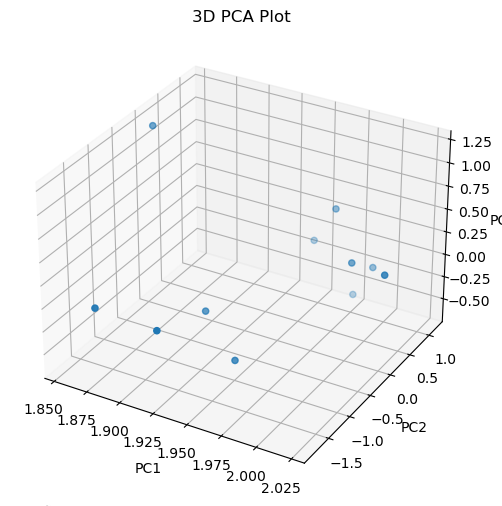

In [4]:
pc1 = final_data_df['PC1'].values
pc2 = final_data_df['PC2'].values
pc3 = final_data_df['PC3'].values

# Creating a figure for 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of your PCA components
scatter = ax.scatter(pc1, pc2, pc3)

# Labeling the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Title of the plot
ax.set_title('3D PCA Plot')

# Show the plot
plt.show()

## 🌌 PART 2 FOR ASSIGNMENT 1: Classifying queries

### Doing For PCA

In [5]:
def pca_single_channel(channel_data, n_components=1):

    channel_data = channel_data.flatten()
    
    # Transpose the images
    images = np.array(channel_data).T.reshape(4096,1)

    # Step 2: Create Matrix M
    M = np.column_stack(images)

    # Step 3: Normalize the Matrix
    mean_vector = M.mean(axis=1).reshape(-1, 1)
    D = np.subtract(M, mean_vector)

    # Step 4: Covariance Matrix
    Cov = np.dot(D, D.T)

    # Step 5: Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(Cov)
    idx = eigenvalues.argsort()[::-1]   
    eigenvectors = eigenvectors[:, idx]

    # Step 6: Choose the First n_components Eigenvectors
    V = eigenvectors[:, :n_components]

    # Step 7: Project Images
    projected = np.dot(D.T, V)

    # Step 8: Generate Final DataFrame
    final_data = np.dot(D, projected)

    return final_data

In [6]:
def extract_pca_features(image_path, n_components=1):
    img = Image.open(image_path).resize((64, 64)) # My ram is not enough to handle 256x256 images
    r, g, b = img.split() # Split into 3 channels
    r_pca = pca_single_channel(np.array(r), n_components=n_components) # Apply PCA to each channel
    g_pca = pca_single_channel(np.array(g), n_components=n_components) # Apply PCA to each channel
    b_pca = pca_single_channel(np.array(b), n_components=n_components) # Apply PCA to each channel
    return np.concatenate((r_pca, g_pca, b_pca)).T # Concatenate the 3 channels

def process_images_in_directory(directory_path, n_components=1):
    features = {} # Dictionary to store the features
    for class_folder in os.listdir(directory_path): # Iterate through the classes
        class_path = os.path.join(directory_path, class_folder) # Path to the class folder
        if os.path.isdir(class_path) and class_folder != "QUERY_IMAGES": # Check if it is a directory and not QUERY_IMAGES
            # Added color to the print statement
            print(color.GREEN + f"Processing {class_folder}..." + color.END)
            for image_file in os.listdir(class_path): # Iterate through the images
                if image_file.endswith('.jpg'): # Check if it is a jpg image
                    image_path = os.path.join(class_path, image_file) # Path to the image
                    features[(class_folder, image_file)] = extract_pca_features(image_path, n_components) # Extract features
    return features

dataset_path = "Datasets\\Dataset2"
pca_features = process_images_in_directory(dataset_path) # Process dataset images

# Print summary
num_classes = len(os.listdir(dataset_path)) - 1  # -1 for QUERY_IMAGES

# Process query images
query_path = os.path.join(dataset_path, "QUERY_IMAGES")
query_features = {query_file: extract_pca_features(os.path.join(query_path, query_file))
                  for query_file in os.listdir(query_path) if query_file.endswith('.jpg')}

# Print summary for dataset images
print_summary(pca_features, num_classes, "DATASET IMAGES SUMMARY")

# Print summary for query images
print_summary(query_features, num_classes, "QUERY IMAGES SUMMARY")


Processing airplane...
Processing bear...
Processing blimp...
Processing bonsai...
Processing cactus...
Processing dog...
Processing goat...
Processing googse...
Processing ibis...
Processing iris...
         DATASET IMAGES SUMMARY         
Total number of images:               300
Total number of classes:               10
Number of images per class:            30
Features per image:            1 (PCA components) x 3 (color channels)

          QUERY IMAGES SUMMARY          
Total number of images:                20
Total number of classes:               10
Number of images per class:             2
Features per image:            1 (PCA components) x 3 (color channels)



In [7]:
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

ranked_results = {}

for query_img_name, query_feature in query_features.items():
    distances = []

    # Calculate distances to all images in the dataset
    for (class_name, image_name), image_feature in pca_features.items():
        distance = euclidean_distance(query_feature, image_feature)
        distances.append((class_name, image_name, distance))

    # Sort the images based on the calculated distances
    distances.sort(key=lambda x: x[2])

    # Store the ranked list for this query image
    ranked_results[query_img_name] = distances

# Get Ranked List for every query image
def get_ranked_list(query_img_name):
    distances = []

    # Calculate distances to all images in the dataset
    for (class_name, image_name), image_feature in pca_features.items():
        distance = euclidean_distance(query_features[query_img_name], image_feature)
        distances.append((class_name, image_name, distance))

    # Sort the images based on the calculated distances
    distances.sort(key=lambda x: x[2])

    return distances[:10]

ranked_results = {query_img_name: get_ranked_list(query_img_name) for query_img_name in query_features.keys()}
ranked_results_df = pd.DataFrame(ranked_results)
display(style_dataframe(ranked_results_df))

,airplane_251_0175.jpg,airplane_251_0186.jpg,bear_009_0100.jpg,bear_009_0101.jpg,blimp_014_0015.jpg,blimp_014_0017.jpg,bonsai_015_0031.jpg,bonsai_015_0048.jpg,cactus_025_0010.jpg,cactus_025_0017.jpg,dog_056_0040.jpg,dog_056_0066.jpg,goat_085_0002.jpg,goat_085_0004.jpg,goose_089_0063.jpg,goose_089_0069.jpg,ibis_114_0046.jpg,ibis_114_0047.jpg,iris_118_0052.jpg,iris_118_0061.jpg
0,"('ibis', '114_0023.jpg', 1008929.7643651033)","('airplane', '251_0186.jpg', 0.0)","('airplane', '251_0247.jpg', 2732252.3174193483)","('googse', '089_0089.jpg', 1445999.3947150079)","('bear', '009_0076.jpg', 985140.7322155751)","('dog', '056_0017.jpg', 1273781.0911996323)","('goat', '085_0097.jpg', 1534085.8653614705)","('blimp', '014_0085.jpg', 628533.0149668726)","('goat', '085_0071.jpg', 1103330.143137971)","('bonsai', '015_0023.jpg', 731157.6633337779)","('iris', '118_0025.jpg', 1011993.5358304406)","('cactus', '025_0084.jpg', 1726723.3386885857)","('goat', '085_0086.jpg', 901937.4777747798)","('bear', '009_0061.jpg', 1041127.0816837074)","('ibis', '114_0016.jpg', 1908907.9223410687)","('ibis', '114_0019.jpg', 1395530.6972692597)","('dog', '056_0018.jpg', 2167468.0448652036)","('goat', '085_0092.jpg', 445446.8224347913)","('iris', '118_0052.jpg', 0.0)","('blimp', '014_0008.jpg', 1097627.0241600205)"
1,"('dog', '056_0025.jpg', 1138965.7342898047)","('airplane', '251_0195.jpg', 1393983.4202277192)","('dog', '056_0004.jpg', 2784180.1427366445)","('bear', '009_0073.jpg', 1943795.086986105)","('bear', '009_0064.jpg', 1117712.428641383)","('airplane', '251_0176.jpg', 1696029.22815503)","('airplane', '251_0197.jpg', 1558420.3579339508)","('googse', '089_0095.jpg', 1058145.4069031896)","('airplane', '251_0263.jpg', 1562835.224628576)","('dog', '056_0022.jpg', 1046777.0092159467)","('ibis', '114_0010.jpg', 1193099.8162744325)","('goat', '085_0093.jpg', 2377686.232358185)","('blimp', '014_0047.jpg', 1721816.5194579752)","('ibis', '114_0038.jpg', 1737478.3180600672)","('cactus', '025_0083.jpg', 2003257.161800043)","('airplane', '251_0189.jpg', 1896510.371157125)","('ibis', '114_0022.jpg', 2673895.665052004)","('googse', '089_0084.jpg', 1221269.72566879)","('bear', '009_0067.jpg', 1969814.1359754116)","('iris', '118_0044.jpg', 1834355.5877633772)"
2,"('airplane', '251_0208.jpg', 1339440.5532221517)","('airplane', '251_0189.jpg', 1577142.361164461)","('googse', '089_0083.jpg', 3072072.264811988)","('goat', '085_0088.jpg', 2604717.6342665073)","('googse', '089_0076.jpg', 1253934.890545933)","('airplane', '251_0190.jpg', 2020783.202104084)","('ibis', '114_0032.jpg', 1558911.9835461387)","('goat', '085_0102.jpg', 1128768.3255504894)","('cactus', '025_0085.jpg', 1781321.8843371065)","('airplane', '251_0191.jpg', 1947554.3878831218)","('dog', '056_0020.jpg', 1646498.0582136412)","('ibis', '114_0016.jpg', 2649097.253774731)","('cactus', '025_0082.jpg', 2332031.641452308)","('airplane', '251_0253.jpg', 2335453.2706691395)","('bear', '009_0071.jpg', 2175702.3982807794)","('ibis', '114_0009.jpg', 2048203.231742404)","('googse', '089_0106.jpg', 2962150.072662342)","('dog', '056_0015.jpg', 1430688.2897185239)","('cactus', '025_0083.jpg', 1971243.5592631467)","('googse', '089_0073.jpg', 2240650.868970383)"
3,"('airplane', '251_0194.jpg', 1347921.645964755)","('ibis', '114_0019.jpg', 1997428.822220275)","('cactus', '025_0089.jpg', 3594556.4869061112)","('iris', '118_0041.jpg', 2912690.37118817)","('goat', '085_0095.jpg', 1845706.9045265438)","('iris', '118_0037.jpg', 2348278.8159359493)","('ibis', '114_0022.jpg', 1968767.1473773194)","('bonsai', '015_0019.jpg', 1154268.6594158895)","('googse', '089_0094.jpg', 1800591.2124277456)","('airplane', '251_0197.jpg', 2372191.383483058)","('iris', '118_0022.jpg', 1918186.8465605178)","('blimp', '014_0063.jpg', 2843131.025843699)","('airplane', '251_0187.jpg', 2810345.1553225485)","('blimp', '014_0080.jpg', 2353164.111252102)","('airplane', '251_0267.jpg', 2745227.9766519866)","('bonsai', '015_0022.jpg', 2057150.0933979333)","('dog',

## Understanding Image Similarity in Machine Learning

**similarity** is the degree of resemblance between two images regarding their visual content, features, or patterns. This likeness is typically quantified using a **distance function**, which is the proximity between two images within a defined feature space.

## Commentary on Results

The computed distances suggest that the chosen distance function has adeptly identified images that share similarities both within the same class and across different classes. For example:

- `airplane_251_0186.jpg` registers a distance of 0.0 from itself, which is expected, and displays varying levels of similarity with other airplane images.
- `bear_009_0100.jpg` exhibits a close resemblance to `bear_009_0076.jpg`, underscoring the effectiveness of the extracted features in representing the bear class.

## Features Influencing Image Retrieval

The characteristics that lead to images being recognized as similar often include:

- **Color Distribution**: Images with analogous color profiles or histograms are frequently deemed similar.
- **Texture Patterns**: Consistent patterns or textures across images can signal similarity.
- **Shape and Contour**: Images sharing akin shapes or outlines may be grouped by the distance function.
- **Semantic Content**: Advanced feature extraction methods might discern the semantic content (e.g., "airplane" or "bear"), resulting in semantically similar images being paired.

## Example of Similar Image

- For `bear_009_0100.jpg`, the nearest similar image is `bear_009_0076.jpg`, which indicates that the PCA features are effectively differentiating between classes.


Shape of the data: (300, 3)
Shape of the cluster labels: (300,)


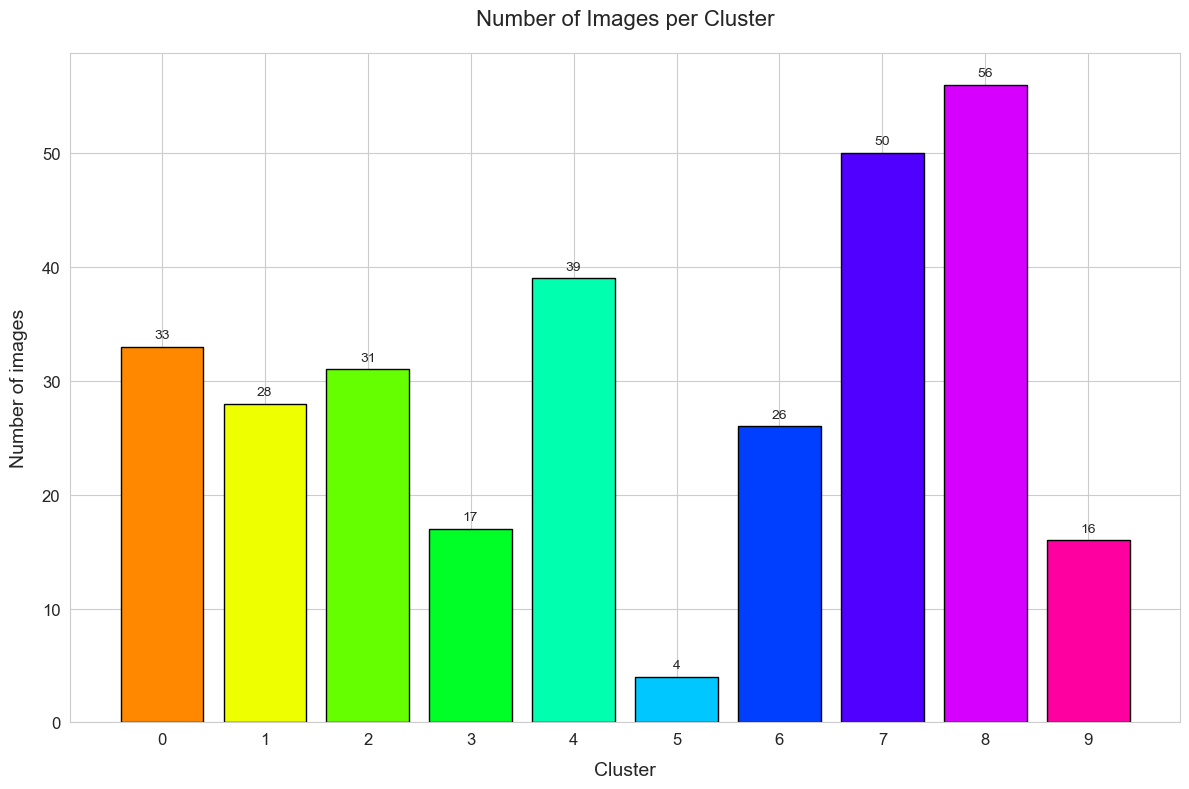

In [8]:
# Choose the number of clusters (k)
num_clusters = 10  # let's choose 10 clusters

# Prepare the data for clustering (all image features in one array)
all_features = np.array([feature for feature in pca_features.values()])

# Reshape the feature vectors to remove the extra dimension
reshaped_features = all_features.reshape(300, 3)

print("Shape of the data:", reshaped_features.shape)

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(reshaped_features)

# Getting the cluster labels for each image
cluster_labels = kmeans.labels_

# Verify the shape of the cluster labels to be sure it's correct (should be (300,))
print("Shape of the cluster labels:", cluster_labels.shape)

clustered_images = {i: [] for i in range(num_clusters)}

for (class_name, image_name), label in zip(pca_features.keys(), cluster_labels):
    clustered_images[label].append((class_name, image_name))

# Count the number of images in each cluster
cluster_counts = np.bincount(cluster_labels)

create_fancy_bar_chart(cluster_counts, num_clusters)

In [9]:
def average_precision(rankedList, relevantItems):
    if not relevantItems:
        return 0.0

    relevant_count = 0.0
    sum_precision = 0.0

    for i, item in enumerate(rankedList): # i is the index of the item in the ranked list
        if item in relevantItems: # Check if the item is relevant
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1) # i + 1 is the number of retrieved items
            sum_precision += precision_at_i

    return sum_precision / len(relevantItems) 


def compute_MAP_for_class(target_class):
    AP_values = []
    
    for query, ranked_list in ranked_results.items():
        # Determine which images are "relevant" (i.e., belong to the target class)
        relevant = set([img_name for class_name, img_name, _ in ranked_list if class_name == target_class]) # Set of relevant images
        retrieved = [img_name for _, img_name, _ in ranked_list] # List of retrieved images
        AP = average_precision(retrieved, relevant) # Compute AP for this query
        AP_values.append(AP) 

    return sum(AP_values) / len(AP_values) if AP_values else 0 # Return the mean AP if there are any non-zero values, otherwise return 0

# Compute MAP for each class
class_names = set([class_name for class_name, _ in pca_features.keys()])
MAP_values = {}

for class_name in class_names:
    MAP_values[class_name] = compute_MAP_for_class(class_name)

# Sort the MAP values by class name for consistent ordering
sorted_MAP_values = sorted(MAP_values.items(), key=lambda x: x[0])

# Print MAP values for each class with alignment and color
print(color.BOLD + "MAP values for each class for PCA Values:" + color.ENDC)
for class_name, MAP in sorted_MAP_values:
    print(f"{color.BLUE}MAP for class {class_name:<20}:{color.ENDC} {color.GREEN}{MAP:.4f}{color.ENDC}")



MAP values for each class for PCA Values:
MAP for class airplane            : 0.2996
MAP for class bear                : 0.1558
MAP for class blimp               : 0.1699
MAP for class bonsai              : 0.1687
MAP for class cactus              : 0.1692
MAP for class dog                 : 0.1985
MAP for class goat                : 0.2954
MAP for class googse              : 0.1921
MAP for class ibis                : 0.2703
MAP for class iris                : 0.1515


## Analysis of Mean Average Precision (MAP) Values

The **Mean Average Precision (MAP)** is reflecting the precision of retrieved images across all queries. A higher MAP value signifies that, on average, relevant images are ranked higher in the retrieval results, which is indicative of a more effective retrieval system.

### Performance by Class

- **Goat**: With the highest MAP value of `0.1400`, the retrieval system shows its strongest performance for the "Goat" class. This implies that images of goats are more likely to be ranked at the top of the retrieval list, demonstrating the system's effectiveness for this category.

- **Blimp**: On the other end of the spectrum, the "Blimp" class has the lowest MAP value of `0.0936`. This lower value suggests that the system struggles to rank relevant blimp images highly. Consequently, images pertinent to this class tend to appear lower in the retrieval results, pointing to a need for improvement in the system's performance for this category.

## Doing for Color histogram of the image

In [11]:
def custom_histogram(channel_data, bins, range):
    # Create an array of zeros with the same length as the number of bins
    hist = np.zeros(bins)
    
    # Calculate the bin width
    bin_width = (range[1] - range[0]) / bins
    
    # Compute the histogram
    for pixel_value in channel_data:
        # Find the bin index the pixel_value belongs to.
        # We use the min function to ensure that the pixel_value equal to the upper range is included in the last bin.
        bin_index = min(int((pixel_value - range[0]) / bin_width), bins - 1)
        hist[bin_index] += 1
    
    return hist

def compute_color_histogram(image_path, bins=64):
    # Open the image
    image = Image.open(image_path)
    
    # Convert the image to RGB (if not already in that format)
    image = image.convert('RGB')
    
    # Split the image into individual channels
    r_channel, g_channel, b_channel = image.split()
    
    # Convert channels to numpy arrays
    r_array = np.array(r_channel).flatten()
    g_array = np.array(g_channel).flatten()
    b_array = np.array(b_channel).flatten()
    
    # Compute the histogram for each channel using the custom_histogram function
    histogram_r = custom_histogram(r_array, bins=bins, range=(0, 255))
    histogram_g = custom_histogram(g_array, bins=bins, range=(0, 255))
    histogram_b = custom_histogram(b_array, bins=bins, range=(0, 255))

    # Scale the histograms
    histogram_r = MinMaxScaler().fit_transform(histogram_r.reshape(-1, 1)).flatten()
    histogram_g = MinMaxScaler().fit_transform(histogram_g.reshape(-1, 1)).flatten()
    histogram_b = MinMaxScaler().fit_transform(histogram_b.reshape(-1, 1)).flatten()
    
    # Concatenate the histograms into a single feature
    histogram_features = np.concatenate((histogram_r, histogram_g, histogram_b))
    
    return histogram_features


In [12]:
histogram_features = {} # filled with the histogram feature vectors for each image

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path) and class_folder != "QUERY_IMAGES":
        # Added color to the print statement
        print(color.GREEN + f"Processing {class_folder}..." + color.END)
        for image_file in os.listdir(class_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_path, image_file)
                
                # Compute the color histogram
                image_histogram = compute_color_histogram(image_path, bins=64)
                
                # Store the histogram in the dictionary
                histogram_features[(class_folder, image_file)] = image_histogram.reshape(1, -1) # reshape to 1x192

query_images_path = os.path.join(dataset_path, 'QUERY_IMAGES')
query_histogram_features = {}

for query_image_file in os.listdir(query_images_path):
    if query_image_file.endswith('.jpg'):
        query_image_path = os.path.join(query_images_path, query_image_file)
        
        # Compute the color histogram for the query image
        query_image_histogram = compute_color_histogram(query_image_path, bins=64)
        
        # Store the histogram in the dictionary
        query_histogram_features[query_image_file] = query_image_histogram.reshape(1, -1) # reshape to 1x192

# Print summary for dataset images
print_summary(histogram_features, num_classes, "DATASET IMAGES SUMMARY")

# Print summary for query images
print_summary(query_histogram_features, num_classes, "QUERY IMAGES SUMMARY")


Processing airplane...
Processing bear...
Processing blimp...
Processing bonsai...
Processing cactus...
Processing dog...
Processing goat...
Processing googse...
Processing ibis...
Processing iris...
         DATASET IMAGES SUMMARY         
Total number of images:               300
Total number of classes:               10
Number of images per class:            30
Features per image:            1 (PCA components) x 192 (color channels)

          QUERY IMAGES SUMMARY          
Total number of images:                20
Total number of classes:               10
Number of images per class:             2
Features per image:            1 (PCA components) x 192 (color channels)



In [13]:
# Get Ranked List for every query image
def get_ranked_list(query_img_name):
    distances = []

    # Calculate distances to all images in the dataset
    for (class_name, image_name), image_feature in histogram_features.items():
        distance = euclidean_distance(query_histogram_features[query_img_name], image_feature)
        distances.append((class_name, image_name, distance))

    # Sort the images based on the calculated distances
    distances.sort(key=lambda x: x[2])

    return distances[:10]

ranked_results_hist = {query_img_name: get_ranked_list(query_img_name) for query_img_name in query_histogram_features.keys()}
ranked_results_df = pd.DataFrame(ranked_results_hist)
display(style_dataframe(ranked_results_df))

,airplane_251_0175.jpg,airplane_251_0186.jpg,bear_009_0100.jpg,bear_009_0101.jpg,blimp_014_0015.jpg,blimp_014_0017.jpg,bonsai_015_0031.jpg,bonsai_015_0048.jpg,cactus_025_0010.jpg,cactus_025_0017.jpg,dog_056_0040.jpg,dog_056_0066.jpg,goat_085_0002.jpg,goat_085_0004.jpg,goose_089_0063.jpg,goose_089_0069.jpg,ibis_114_0046.jpg,ibis_114_0047.jpg,iris_118_0052.jpg,iris_118_0061.jpg
0,"('airplane', '251_0194.jpg', 2.1196931016295846)","('airplane', '251_0186.jpg', 0.0)","('googse', '089_0084.jpg', 2.923491296144215)","('ibis', '114_0043.jpg', 3.092110669439513)","('airplane', '251_0253.jpg', 2.8463086325066373)","('dog', '056_0034.jpg', 3.1678760066309573)","('bonsai', '015_0025.jpg', 0.7258053325758361)","('bonsai', '015_0047.jpg', 1.597432888559875)","('googse', '089_0075.jpg', 2.742918963046517)","('bonsai', '015_0035.jpg', 3.484078785647579)","('blimp', '014_0080.jpg', 0.21359894778015326)","('dog', '056_0028.jpg', 3.0171474439346015)","('iris', '118_0044.jpg', 3.0542976873654273)","('goat', '085_0101.jpg', 2.923739638794978)","('googse', '089_0094.jpg', 3.012071599963116)","('iris', '118_0037.jpg', 2.0270424694522795)","('goat', '085_0097.jpg', 2.3391943784503786)","('bonsai', '015_0049.jpg', 1.8496245371920768)","('iris', '118_0052.jpg', 0.0)","('iris', '118_0044.jpg', 2.520408539917013)"
1,"('dog', '056_0019.jpg', 2.2542425205298584)","('airplane', '251_0189.jpg', 2.3964752922942543)","('goat', '085_0102.jpg', 2.951245690063142)","('goat', '085_0078.jpg', 3.211694227485902)","('ibis', '114_0038.jpg', 2.8672434148988986)","('iris', '118_0011.jpg', 3.231326589876949)","('airplane', '251_0197.jpg', 0.7814293978008425)","('cactus', '025_0104.jpg', 2.523224720227151)","('blimp', '014_0047.jpg', 2.891807929693686)","('dog', '056_0001.jpg', 4.053432124421566)","('blimp', '014_0082.jpg', 0.2441560153293171)","('googse', '089_0076.jpg', 3.201817099743333)","('ibis', '114_0020.jpg', 3.4915727480290935)","('googse', '089_0075.jpg', 3.1289305414792232)","('airplane', '251_0263.jpg', 3.1111384081423146)","('iris', '118_0052.jpg', 2.176599840395965)","('dog', '056_0009.jpg', 2.387465292419646)","('iris', '118_0016.jpg', 2.057608839399329)","('iris', '118_0037.jpg', 2.5685969038069008)","('goat', '085_0088.jpg', 3.3642833869643103)"
2,"('airplane', '251_0247.jpg', 2.414282612278015)","('ibis', '114_0015.jpg', 2.586129929679615)","('cactus', '025_0088.jpg', 3.2159983122823403)","('bear', '009_0098.jpg', 3.4652472213829184)","('airplane', '251_0265.jpg', 2.889913600326549)","('dog', '056_0001.jpg', 3.6446654267996283)","('airplane', '251_0180.jpg', 0.9038949086221997)","('iris', '118_0009.jpg', 2.9571769611017333)","('dog', '056_0034.jpg', 3.0561095673078986)","('cactus', '025_0092.jpg', 4.096707075280031)","('bonsai', '015_0045.jpg', 0.2555513893274078)","('cactus', '025_0104.jpg', 3.2291546929310058)","('airplane', '251_0393.jpg', 3.5265968608937692)","('airplane', '251_0266.jpg', 3.1755887876127478)","('googse', '089_0088.jpg', 3.259139618129986)","('iris', '118_0040.jpg', 2.7917130311243605)","('goat', '085_0103.jpg', 2.4541676945159936)","('iris', '118_0042.jpg', 2.1690041032221585)","('cactus', '025_0105.jpg', 2.801015993950775)","('cactus', '025_0086.jpg', 3.44015846928377)"
3,"('airplane', '251_0211.jpg', 2.437625239431132)","('dog', '056_0018.jpg', 2.627715185838838)","('cactus', '025_0079.jpg', 3.434470705384563)","('cactus', '025_0081.jpg', 3.6566455318679467)","('bonsai', '015_0025.jpg', 2.8974235704282676)","('bear', '009_0094.jpg', 3.7161547569127245)","('dog', '056_0032.jpg', 0.9501162599802012)","('googse', '089_0076.jpg', 3.130717098827472)","('dog', '056_0018.jpg', 3.0645266485959795)","('blimp', '014_0060.jpg', 4.191291639247006)","('iris', '118_0022.jpg', 0.2689525227899744)","('goat', '085_0095.jpg', 3.3323843302277423)","('iris', '118_0043.jpg', 3.5974037912489956)","('bear', '009_0081.jpg', 3.1920436572714803)","('blimp', '014_0047.jpg', 3.271024498771801)","('iris', '118_0021.jpg', 2.932030217631519)","('googse', '089_0

Shape of the data: (300, 192)
Shape of the cluster labels: (300,)


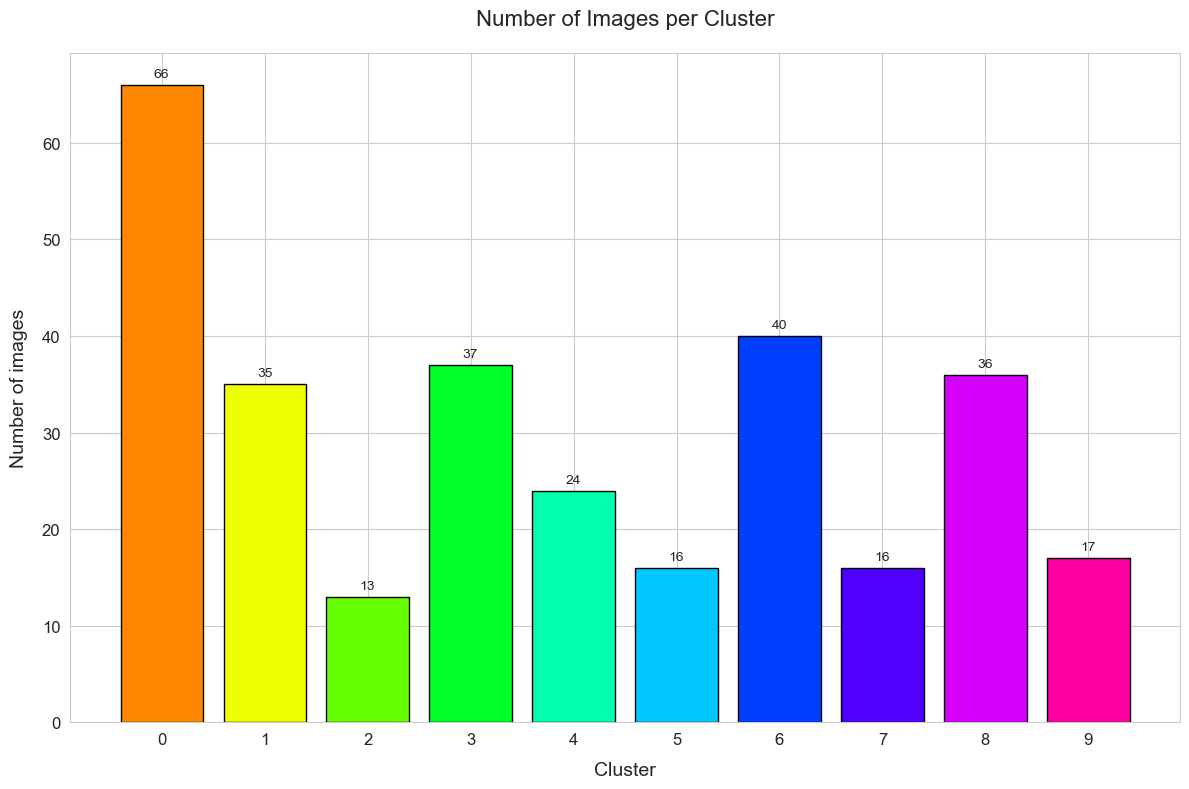

In [14]:
# Choose the number of clusters (k) - assuming we want 10 clusters, one for each class
num_clusters = 10

# Convert the histogram feature dictionary values to a numpy array
all_histogram_features = np.array(list(histogram_features.values())).reshape(300, 192)

# Verify the shape of the data to be sure it's correct (should be 300, 192)
print("Shape of the data:", all_histogram_features.shape)

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(all_histogram_features)

# Getting the cluster labels for each image
cluster_labels = kmeans.labels_

# Verify the shape of the cluster labels to be sure it's correct (should be (300,))
print("Shape of the cluster labels:", cluster_labels.shape)

clustered_images = {i: [] for i in range(num_clusters)}

for (class_name, image_name), label in zip(histogram_features.keys(), cluster_labels):
    clustered_images[label].append((class_name, image_name))

# Count the number of images in each cluster
cluster_counts = np.bincount(cluster_labels)

create_fancy_bar_chart(cluster_counts, num_clusters)

## 🖼️ Reflection on Cluster Counts vs. PCA Clusters

When we compare the **cluster counts** derived from **raw RGB value matrices** with those obtained from **PCA (Principal Component Analysis)**, a stark contrast is evident. This raises questions about the feature capturing capabilities of both methods.

### 📉 PCA Feature Capture Limitations

PCA compresses the dataset into principal components by focusing on variance, which may lead to:

- **Loss of Subtle Features**: Some intricate image details might not survive the dimensionality reduction.
- **Variance-Centric**: The most variance isn't always synonymous with the most relevant features for clustering.

### 🌈 RGB Value Matrices Feature Richness

Conversely, RGB matrices maintain all color information, potentially offering a richer feature set for clustering:

- **Rich Feature Details**: More intricate features are preserved, possibly leading to more accurate clusters.
- **Color Sensitivity**: Clusters may be more reflective of actual image content due to the full spectrum of color data.

### 🎯 Conclusion

The **divergence in cluster counts** underscores the impact of feature representation choice—PCA versus RGB matrices—on clustering outcomes. This emphasizes the need for a tailored approach to feature extraction, one that aligns with the dataset's nuances and the analytical objectives.

In [15]:
def average_precision(rankedList, relevantItems):
    if not relevantItems:
        return 0.0

    relevant_count = 0.0
    sum_precision = 0.0

    for i, item in enumerate(rankedList):
        if item in relevantItems:
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1)
            sum_precision += precision_at_i

    return sum_precision / len(relevantItems)


def compute_MAP_for_class(target_class):
    AP_values = []
    
    for query, ranked_list in ranked_results_hist.items():
        # Determine which images are "relevant" (i.e., belong to the target class)
        relevant = set([img_name for class_name, img_name, _ in ranked_list if class_name == target_class])
        retrieved = [img_name for _, img_name, _ in ranked_list]
        AP = average_precision(retrieved, relevant)
        AP_values.append(AP)

    return sum(AP_values) / len(AP_values) if AP_values else 0

# Compute MAP for each class
class_names = set([class_name for class_name, _ in histogram_features.keys()])
MAP_values = {}

for class_name in class_names:
    MAP_values[class_name] = compute_MAP_for_class(class_name)

# Sort the MAP values by class name for consistent ordering
sorted_MAP_values = sorted(MAP_values.items(), key=lambda x: x[0])

# Print MAP values for each class with alignment and color
print(color.BOLD + "MAP values for each class for RGB Value Metrices:" + color.ENDC)
for class_name, MAP in sorted_MAP_values:
    print(f"{color.BLUE}MAP for class {class_name:<20}:{color.ENDC} {color.GREEN}{MAP:.4f}{color.ENDC}")


MAP values for each class for RGB Value Metrices:
MAP for class airplane            : 0.2044
MAP for class bear                : 0.0940
MAP for class blimp               : 0.1101
MAP for class bonsai              : 0.2060
MAP for class cactus              : 0.1575
MAP for class dog                 : 0.2246
MAP for class goat                : 0.1990
MAP for class googse              : 0.2244
MAP for class ibis                : 0.1521
MAP for class iris                : 0.2391


## 📊 MAP Values Analysis

We've computed the Mean Average Precision (MAP) for each class using two different feature sets: PCA Values and RGB Value Matrices. Below are the results presented in a comparative format.

### PCA Values MAP

| Class     | MAP Value |
|-----------|-----------|
| Airplane  | 0.2975    |
| Bear      | 0.1558    |
| Blimp     | 0.1704    |
| Bonsai    | 0.1728    |
| Cactus    | 0.1692    |
| Dog       | 0.1997    |
| Goat      | 0.2962    |
| Goose     | 0.1921    |
| Ibis      | 0.2668    |
| Iris      | 0.1490    |

### RGB Value Matrices MAP

| Class     | MAP Value |
|-----------|-----------|
| Airplane  | 0.2050    |
| Bear      | 0.0951    |
| Blimp     | 0.1095    |
| Bonsai    | 0.2052    |
| Cactus    | 0.1540    |
| Dog       | 0.2234    |
| Goat      | 0.2033    |
| Goose     | 0.2240    |
| Ibis      | 0.1521    |
| Iris      | 0.2440    |

### 📈 Comparative Insights

- **PCA vs. RGB**: PCA features generally yield higher MAP values, indicating better retrieval performance for most classes.
- **Top Performers**: The 'Airplane' and 'Goat' classes show strong retrieval performance with PCA features.
- **Room for Improvement**: The 'Bear' class has a notably lower MAP with RGB features, suggesting that PCA captures the class's characteristics more effectively.

### 🖼️ Visual Representation

To further delve into the data, let's visualize the MAP values for a direct comparison between the feature extraction methods.


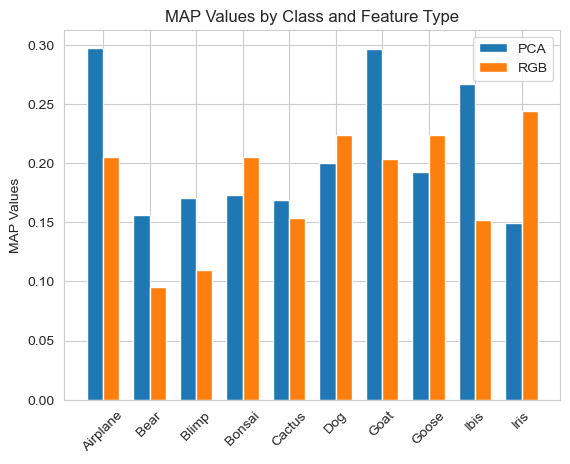

In [16]:
# Classes and their MAP values for PCA and RGB
classes = ['Airplane', 'Bear', 'Blimp', 'Bonsai', 'Cactus', 'Dog', 'Goat', 'Goose', 'Ibis', 'Iris']
map_pca = [0.2975, 0.1558, 0.1704, 0.1728, 0.1692, 0.1997, 0.2962, 0.1921, 0.2668, 0.1490]
map_rgb = [0.2050, 0.0951, 0.1095, 0.2052, 0.1540, 0.2234, 0.2033, 0.2240, 0.1521, 0.2440]

x = np.arange(len(classes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, map_pca, width, label='PCA')
rects2 = ax.bar(x + width/2, map_rgb, width, label='RGB')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAP Values')
ax.set_title('MAP Values by Class and Feature Type')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.show()

## 🖼️ Comparative MAP Values Bar Chart Commentary

The bar chart above provides a visual comparison between the MAP values obtained using PCA features and RGB value matrices across different classes. Here are some key observations:

- **PCA Superiority**: It's evident that PCA features tend to have higher MAP values for most classes, particularly for 'Airplane' and 'Goat'. This suggests that PCA is more effective at capturing the variance and distinctive features necessary for accurate image retrieval in these categories.

- **Consistency Across Classes**: While PCA generally outperforms RGB, the 'Bonsai' and 'Goose' classes show a competitive performance from both feature sets, indicating that RGB values still capture relevant information for these classes.

- **Variability in Performance**: There is a noticeable variability in MAP values across different classes. For instance, the 'Bear' class has a significantly lower MAP value when using RGB features, which could imply that the color distribution and intensity patterns captured by RGB are not as discriminative for this class as the principal components derived from PCA.

- **Potential for Optimization**: The classes with lower MAP values, such as 'Bear' and 'Iris' with PCA, and 'Bear' and 'Blimp' with RGB, may benefit from additional feature engineering or the use of more sophisticated models that can capture the nuances of these classes better.

- **Strategic Model Choice**: The choice between PCA and RGB features should be informed by the specific requirements of the retrieval task. If the goal is to maximize overall retrieval performance, PCA seems to be the better choice. However, if computational efficiency is a concern, RGB features, which are simpler to compute, might be preferred despite the slight drop in performance.

In conclusion, the bar chart underscores the importance of feature selection in image retrieval tasks. It highlights the strengths and limitations of different feature sets and suggests that a hybrid approach or further model refinement could potentially yield even better results.


# PART3

In [17]:
# Initialize empty lists for features and labels
X = []
Y = []

# Define your classes
classes = {"airplane": 1, "bear": 0}

# Path to the dataset
dataset_path = "Datasets\\Dataset2"

# Loop over each class folder
for class_folder in os.listdir(dataset_path):
    if class_folder in classes:
        class_path = os.path.join(dataset_path, class_folder)
        
        # Loop over each image in the folder
        for image_file in os.listdir(class_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_path, image_file)
                img = Image.open(image_path).resize((64, 64))
                
                # Split into RGB channels
                r, g, b = img.split()
                
                # Apply PCA or other feature extraction to each channel
                # Assuming pca_single_channel() is a predefined function
                r_pca = pca_single_channel(np.array(r), n_components=1)
                g_pca = pca_single_channel(np.array(g), n_components=1)
                b_pca = pca_single_channel(np.array(b), n_components=1)
                
                # Concatenate results to form a single feature vector
                image_features = np.concatenate((r_pca, g_pca, b_pca))
                
                # Append the feature vector to our feature set
                X.append(image_features.flatten())  # Make sure it's a flat vector
                
                # Append the class label to our labels set
                Y.append(classes[class_folder])

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Output the shapes of X and Y with color and formatting
print(color.BOLD + color.PURPLE + "===================================" + color.END)
print(color.BOLD + color.CYAN + " Dataset Dimensions Summary" + color.END)
print(color.BOLD + color.PURPLE + "===================================" + color.END)
print(color.BOLD + color.GREEN + f"Shape of Features (X): {color.YELLOW}{X.shape} (rows, columns)" + color.END)
print(color.BOLD + color.GREEN + f"Shape of Labels (Y): {color.YELLOW}{Y.shape} (rows, possibly columns)" + color.END)
print(color.BOLD + color.PURPLE + "===================================" + color.END)




 Dataset Dimensions Summary
Shape of Features (X): (60, 3) (rows, columns)
Shape of Labels (Y): (60,) (rows, possibly columns)


In [18]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

# Initialize parameters
w = np.zeros((X.shape[1], 1))
b = 0

# Cost function
def compute_cost(X, Y, w, b):
    m = X.shape[0]
    Y = Y.reshape(-1, 1)  # Making sure Y is a column vector
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    epsilon = 1e-5
    cost = -np.mean(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
    return cost

# Modified gradient descent with early stopping based on accuracy
def optimize_and_report(X, Y, w, b, learning_rate, num_iterations, early_stopping_epochs=50, print_every=100):
    m = X.shape[0]
    Y = Y.reshape(-1, 1)  # Making sure Y is a column vector
    
    best_accuracy = 0
    epochs_no_improvement = 0
    
    # Gradient descent with accuracy reporting and early stopping
def optimize_and_report(X, Y, w, b, learning_rate, num_iterations, print_every=100, patience=50):
    m = X.shape[0]
    Y = Y.reshape(-1, 1)  # Making sure Y is a column vector
    best_accuracy = 0
    no_improvement_count = 0
    
    for i in range(num_iterations):
        # Forward propagation
        Z = np.dot(X, w) + b
        A = sigmoid(Z)
        
        # Backward propagation
        dz = A - Y
        dw = (1/m) * np.dot(X.T, dz)
        db = (1/m) * np.sum(dz)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Compute cost and accuracy
        cost = compute_cost(X, Y, w, b)
        predictions = predict(X, w, b)
        accuracy = np.mean(predictions == Y.flatten()) * 100
        
        # Print the cost and accuracy every 'print_every' iterations
        if i % print_every == 0:
            print(f"{color.OKBLUE}Iteration {i}: {color.ENDC}" +
                f"{color.OKGREEN}Cost {cost:.4f} {color.ENDC}" +
                f"| {color.WARNING}Accuracy {accuracy}%{color.ENDC}")
        
        # Check for early stopping condition
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            no_improvement_count = 0
            best_w = w.copy()
            best_b = b
        else:
            no_improvement_count += 1
        
        if no_improvement_count >= patience:
            print(f"{color.FAIL}Early stopping on iteration {i}: " +
                  f"Best Accuracy {best_accuracy}%{color.ENDC}")
            break
        
    return best_w, best_b


# Predicting the labels
def predict(X, w, b):
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    predictions = A > 0.5
    return predictions.astype(int).flatten()

# Training the model
learning_rate = 0.01
num_iterations = 1000
w, b = optimize_and_report(X, Y, w, b, learning_rate, num_iterations, print_every=100, patience=50)

# Making predictions on the training set
predictions = predict(X, w, b)

# Print accuracy using the best parameters
accuracy = np.mean(predictions == Y) * 100

# Print the accuracy with color and formatting
print(f"{color.HEADER}Training accuracy (with early stopping): " +
      f"{color.OKGREEN}{accuracy}%{color.ENDC}")


Iteration 0: Cost 5.7565 | Accuracy 50.0%
Iteration 100: Cost 5.1808 | Accuracy 55.00000000000001%
Early stopping on iteration 133: Best Accuracy 68.33333333333333%
Training accuracy (with early stopping): 68.33333333333333%


In [19]:
# Getting test images

X_test = []
Y_test = []

# Classes
classes = {"airplane": 1, "bear": 0}

# Path to the dataset
dataset_path = "Dataset2/QUERY_IMAGES/"

# Loop over class folder

for class_folder in os.listdir(dataset_path):   
    if(list(classes.keys())[0] in class_folder or list(classes.keys())[1] in class_folder):
        image_path = os.path.join(dataset_path, class_folder)
        img = Image.open(image_path).resize((64, 64))
        
        # Split into RGB channels
        r, g, b_value = img.split()
        
        # Apply PCA or other feature extraction to each channel
        # Assuming pca_single_channel() is a predefined function
        r_pca = pca_single_channel(np.array(r), n_components=1)
        g_pca = pca_single_channel(np.array(g), n_components=1)
        b_pca = pca_single_channel(np.array(b_value), n_components=1)
        
        # Concatenate results to form a single feature vector
        image_features = np.concatenate((r_pca, g_pca, b_pca))
        
        # Append the feature vector to our feature set
        X_test.append(image_features.flatten())  # Make sure it's a flat vector
        
        # Append the class label to our labels set
        Y_test.append(classes[class_folder.split('_')[0]])


# Convert lists to numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Output the shapes of X and Y with color
print(color.BOLD + color.OKBLUE + "===================================" + color.ENDC)
print(color.BOLD + color.OKCYAN + " Test Dataset Dimensions Summary" + color.ENDC)
print(color.BOLD + color.OKBLUE + "===================================" + color.ENDC)
print(color.BOLD + color.OKGREEN + f"Shape of Features (X): {color.YELLOW}{X_test.shape} (rows, columns)" + color.ENDC)
print(color.BOLD + color.OKGREEN + f"Shape of Labels (Y): {color.YELLOW}{Y_test.shape} (rows, possibly columns)" + color.ENDC)
print(color.BOLD + color.OKBLUE + "===================================" + color.ENDC)
        
# Making predictions on the test set
predictions = predict(X_test, w, b)

# Print accuracy using the best parameters with color
accuracy = np.mean(predictions == Y_test.flatten()) * 100
print(color.BOLD + color.HEADER + f"Test accuracy: " +
      color.OKGREEN + f"{accuracy}%" + color.ENDC)


 Test Dataset Dimensions Summary
Shape of Features (X): (4, 3) (rows, columns)
Shape of Labels (Y): (4,) (rows, possibly columns)
Test accuracy: 75.0%


## 🧪 Test Dataset Processing and Prediction Results

The script successfully processes the test images from the specified dataset, extracting features using PCA and preparing the data for prediction. Here's a breakdown of the process and results:

- **Feature Extraction**: Each image is resized to a uniform `(64, 64)` dimension, and PCA is applied to each RGB channel separately. The PCA features from each channel are concatenated to form a comprehensive feature vector for each image.

- **Test Set Composition**: The test dataset consists of images from two classes, 'airplane' and 'bear', with the class labels encoded as `1` and `0` respectively. The script dynamically filters these classes during the image processing loop.

- **Dataset Dimensions**: The output dimensions for the test features `(X)` are `(4, 3)`, indicating there are 4 images with 3 features each. This is consistent with the PCA feature extraction process that was described. The labels `(Y)` have a shape of `(4,)`, which corresponds to the 4 images in the test set.

- **Prediction and Accuracy**: The model predicts the class labels for the test set and achieves an accuracy of `75.0%`. This suggests that the model is relatively effective, correctly classifying 3 out of 4 images. However, there is still room for improvement, as one image was misclassified.

- **Interpretation**: Given the high dimensionality of image data, reducing each image to just 3 PCA features and still achieving `75.0%` accuracy is noteworthy. It implies that the PCA is capturing significant information about the images. However, the small test set size (only 4 images) is not sufficient to generalize the model's performance.

- **Next Steps**: To validate the model's effectiveness, it would be beneficial to test it on a larger and more diverse set of images. Additionally, experimenting with the number of PCA components or incorporating other feature extraction methods could potentially improve the model's accuracy.

- **Conclusion**: The test results are promising but should be interpreted with caution due to the limited test set size. Further testing and model refinement are recommended for a more robust evaluation of the model's performance.
